Dialogue Count Data:
          Character  DialogueCount
0        Tony Stark            308
1      Steve Rogers            161
2            JARVIS             23
3              Thor            133
4  Natasha Romanoff             96


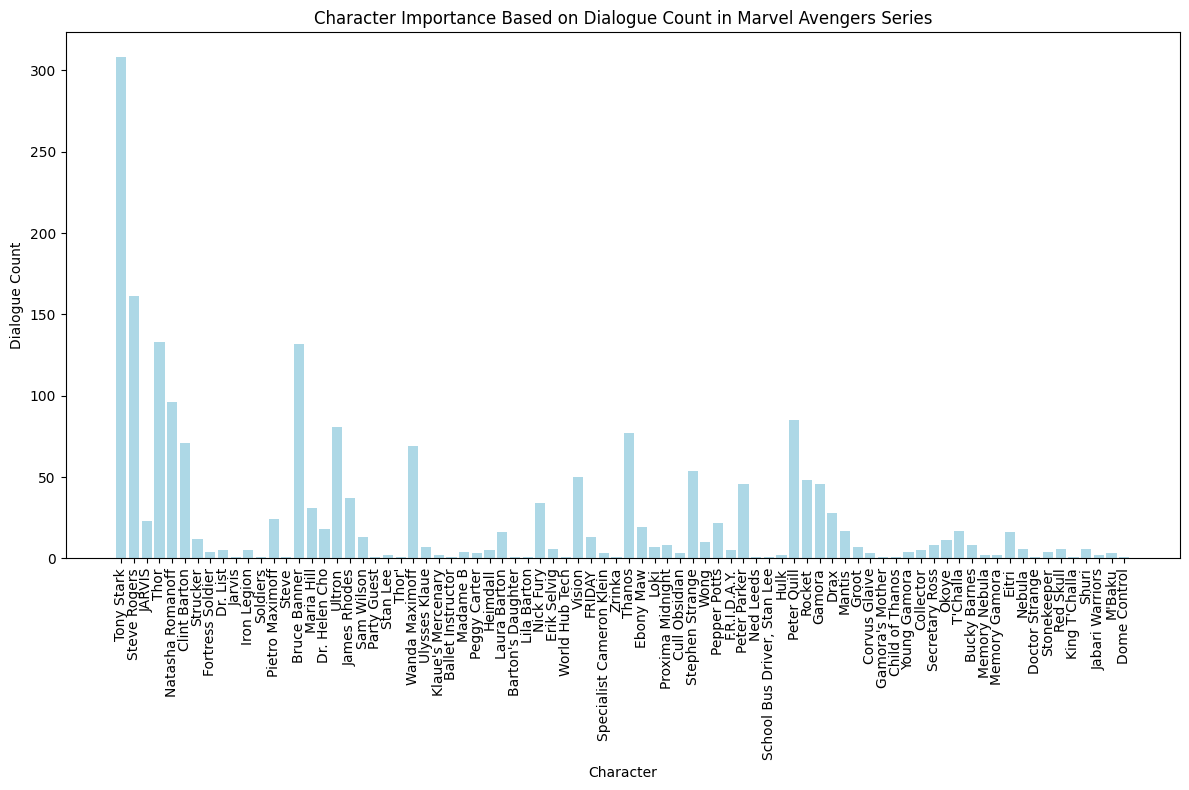

In [7]:
# 1. The importance of a character's amount of dialogue

# Ensure the required libraries are installed
!pip install networkx beautifulsoup4 lxml matplotlib plotly

import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
from bs4 import BeautifulSoup
import os

# Define a function to parse XML and count dialogues
def parse_xml_for_dialogues(xml_path):
    with open(xml_path, 'r', encoding='utf-8') as file:
        soup = BeautifulSoup(file, 'xml')

    # Dictionary to store dialogue count
    dialogue_count = {}

    # Extract dialogues
    dialogues = soup.find_all('dialogue')
    for dialogue in dialogues:
        speaker = dialogue.find('speaker').text
        if speaker in dialogue_count:
            dialogue_count[speaker] += 1
        else:
            dialogue_count[speaker] = 1

    return dialogue_count

# List of XML files (paths adjusted for Colab environment)
xml_files = [
    '/content/Avengers_xml.xml',
    '/content/Age_of_Ultron_xml.xml',
    '/content/Infinity_War_xml.xml',
    '/content/Avengers_Endgame_xml.xml'
]

# Combine dialogue counts from all XML files
combined_dialogue_count = {}

for xml_file in xml_files:
    dialogue_count = parse_xml_for_dialogues(xml_file)
    for speaker, count in dialogue_count.items():
        if speaker in combined_dialogue_count:
            combined_dialogue_count[speaker] += count
        else:
            combined_dialogue_count[speaker] = count

# Convert the dialogue count to a pandas DataFrame
dialogue_df = pd.DataFrame(list(combined_dialogue_count.items()), columns=['Character', 'DialogueCount'])

# Check the dialogue data
print("Dialogue Count Data:")
print(dialogue_df.head())

# Plot the dialogue count using Plotly
fig = px.bar(dialogue_df, x='Character', y='DialogueCount', title='Character Importance Based on Dialogue Count in Marvel Avengers Series')
fig.show()

# Save plot as an HTML file
fig.write_html("/content/character_dialogue_importance.html")

# Alternatively, plot using Matplotlib
plt.figure(figsize=(12, 8))
plt.bar(dialogue_df['Character'], dialogue_df['DialogueCount'], color='lightblue')
plt.xlabel('Character')
plt.ylabel('Dialogue Count')
plt.title('Character Importance Based on Dialogue Count in Marvel Avengers Series')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Centrality Data:
          Character  Centrality
0      Steve Rogers    0.468354
1        Tony Stark    0.493671
2            JARVIS    0.088608
3              Thor    0.417722
4  Natasha Romanoff    0.379747


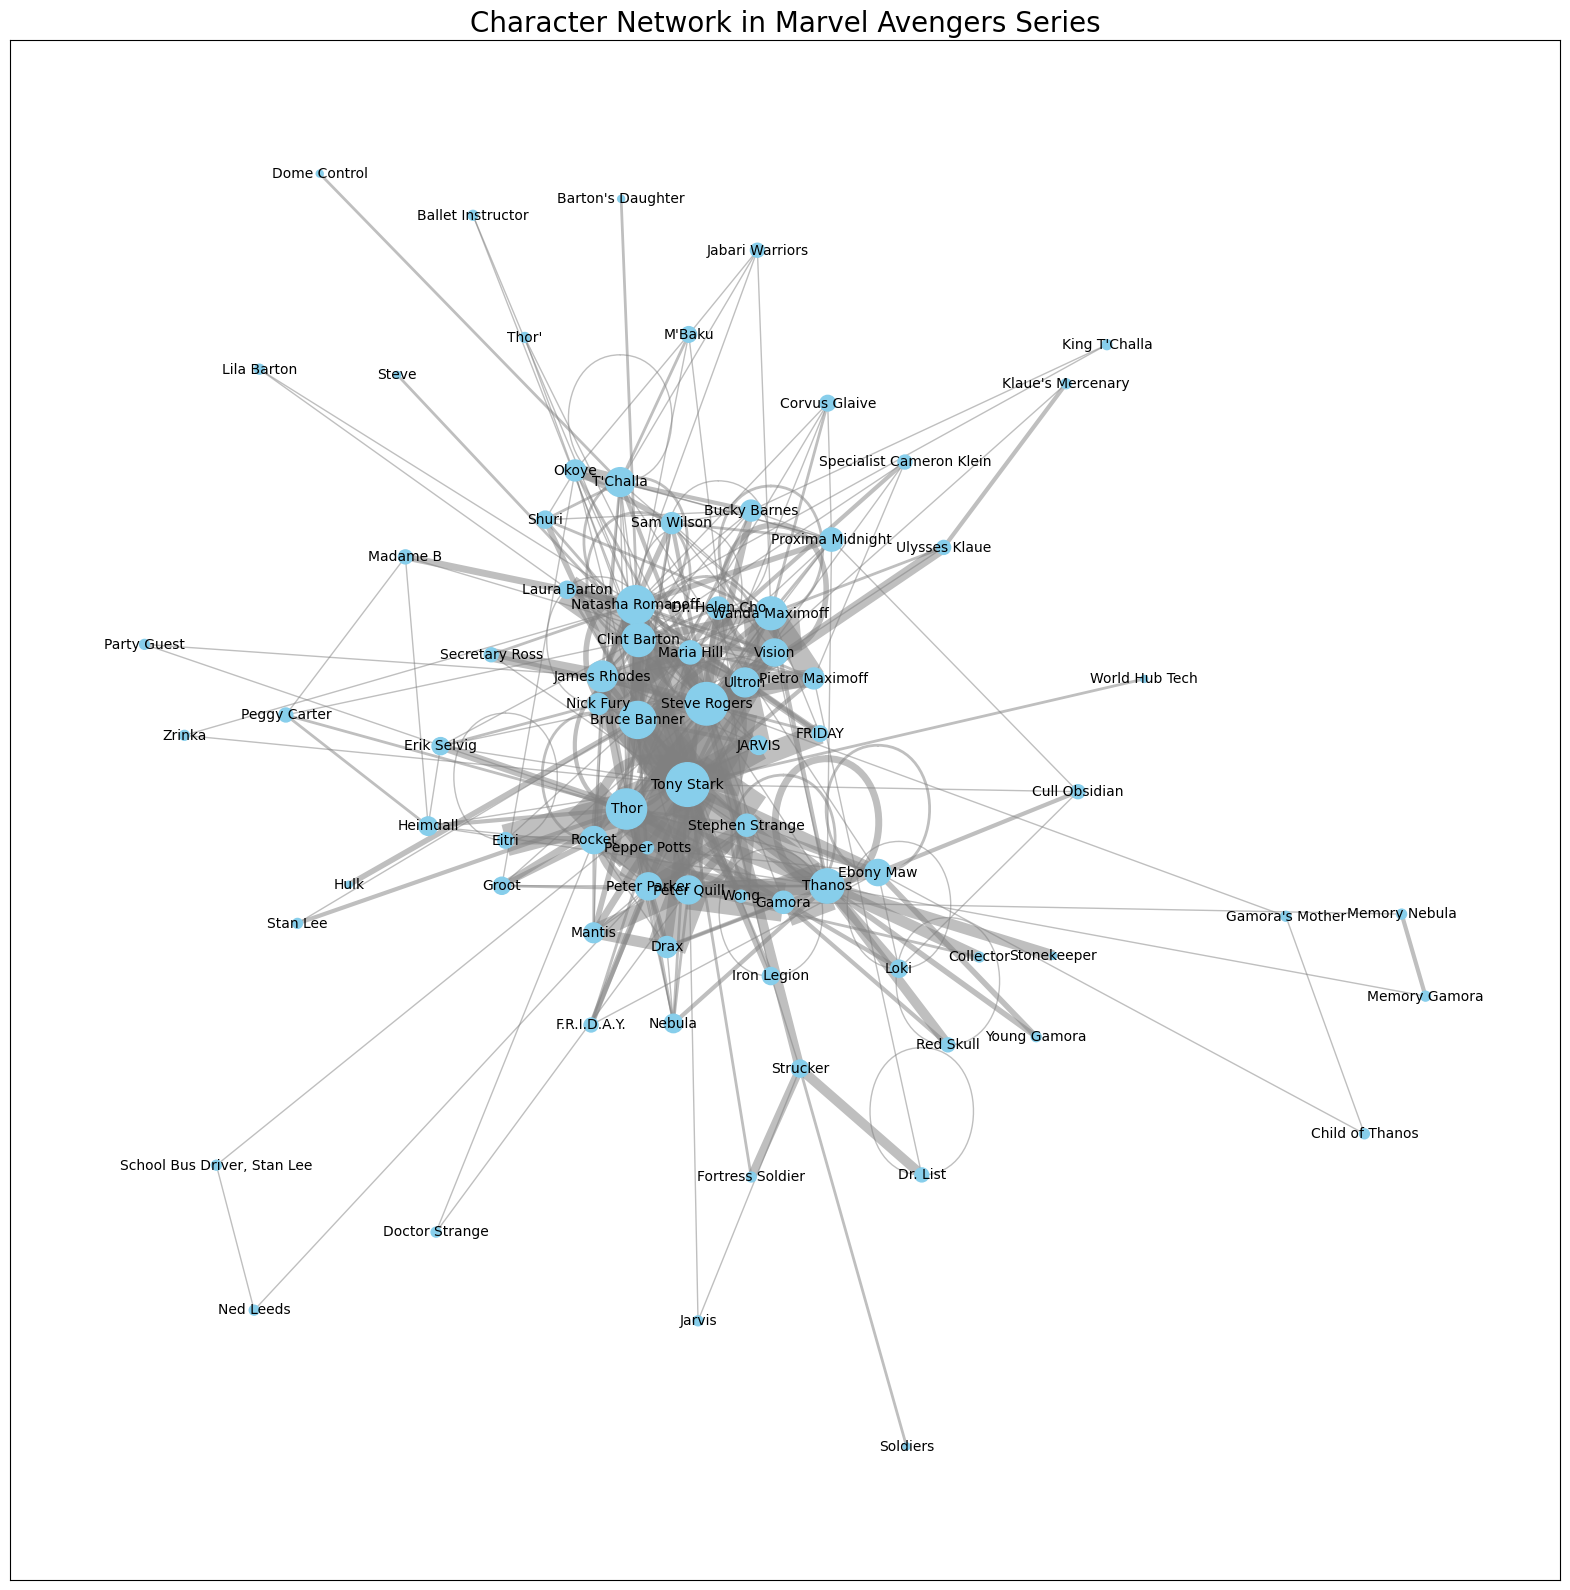

In [10]:
# 2. The importance of the relationship between characters

# Ensure the required libraries are installed
!pip install networkx beautifulsoup4 lxml matplotlib

import networkx as nx
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

# Define a function to parse XML and create the network
def parse_xml_to_network(xml_path):
    with open(xml_path, 'r', encoding='utf-8') as file:
        soup = BeautifulSoup(file, 'xml')

    G = nx.Graph()

    # Extract characters and interactions
    dialogues = soup.find_all('dialogue')
    for dialogue in dialogues:
        speaker = dialogue.find('speaker').text
        receiver = dialogue.find('receiver').text if dialogue.find('receiver') else None
        if receiver:
            if G.has_edge(speaker, receiver):
                G[speaker][receiver]['weight'] += 1
            else:
                G.add_edge(speaker, receiver, weight=1)

    return G

# List of XML files (paths adjusted for Colab environment)
xml_files = [
    '/content/Avengers_xml.xml',
    '/content/Age_of_Ultron_xml.xml',
    '/content/Infinity_War_xml.xml',
    '/content/Avengers_Endgame_xml.xml'
]

# Create a combined network from all XML files
combined_network = nx.Graph()

for xml_file in xml_files:
    network = parse_xml_to_network(xml_file)
    combined_network = nx.compose(combined_network, network)

# Calculate degree centrality for importance
centrality = nx.degree_centrality(combined_network)

# Convert centrality to a pandas DataFrame
centrality_df = pd.DataFrame(list(centrality.items()), columns=['Character', 'Centrality'])

# Check the centrality data
print("Centrality Data:")
print(centrality_df.head())

# Network visualization with Matplotlib and NetworkX
plt.figure(figsize=(20, 20))  # Increase figure size for better visibility
pos = nx.spring_layout(combined_network, seed=42, k=0.15, iterations=50)  # More iterations and distance between nodes

# Draw nodes with sizes proportional to their centrality
sizes = [2000 * centrality[node] for node in combined_network.nodes()]  # Increase node sizes
nx.draw_networkx_nodes(combined_network, pos, node_size=sizes, node_color='skyblue')

# Draw edges with widths proportional to their weights
weights = [combined_network[u][v]['weight'] for u, v in combined_network.edges()]
nx.draw_networkx_edges(combined_network, pos, width=weights, alpha=0.5, edge_color='gray')

# Draw labels
nx.draw_networkx_labels(combined_network, pos, font_size=10, font_family="sans-serif")

plt.title('Character Network in Marvel Avengers Series', fontsize=20)
plt.show()

# Alternatively, plot the centrality using Plotly for a different view
import plotly.express as px

fig = px.bar(centrality_df, x='Character', y='Centrality', title='Character Importance Based on Network Centrality in Marvel Avengers Series')
fig.show()


In [11]:
# Ensure the required libraries are installed
!pip install plotly

import plotly.express as px

# Convert centrality to a pandas DataFrame (assuming centrality_df already exists)
centrality_df = centrality_df.sort_values('Centrality', ascending=False)

# Plot the centrality using Plotly with adjusted x-axis labels
fig = px.bar(centrality_df, x='Character', y='Centrality', title='Character Importance Based on Network Centrality in Marvel Avengers Series')
fig.update_layout(
    xaxis_tickangle=-45,  # Rotate x-axis labels
    width=1000,  # Increase plot width
    height=600   # Increase plot height
)
fig.show()


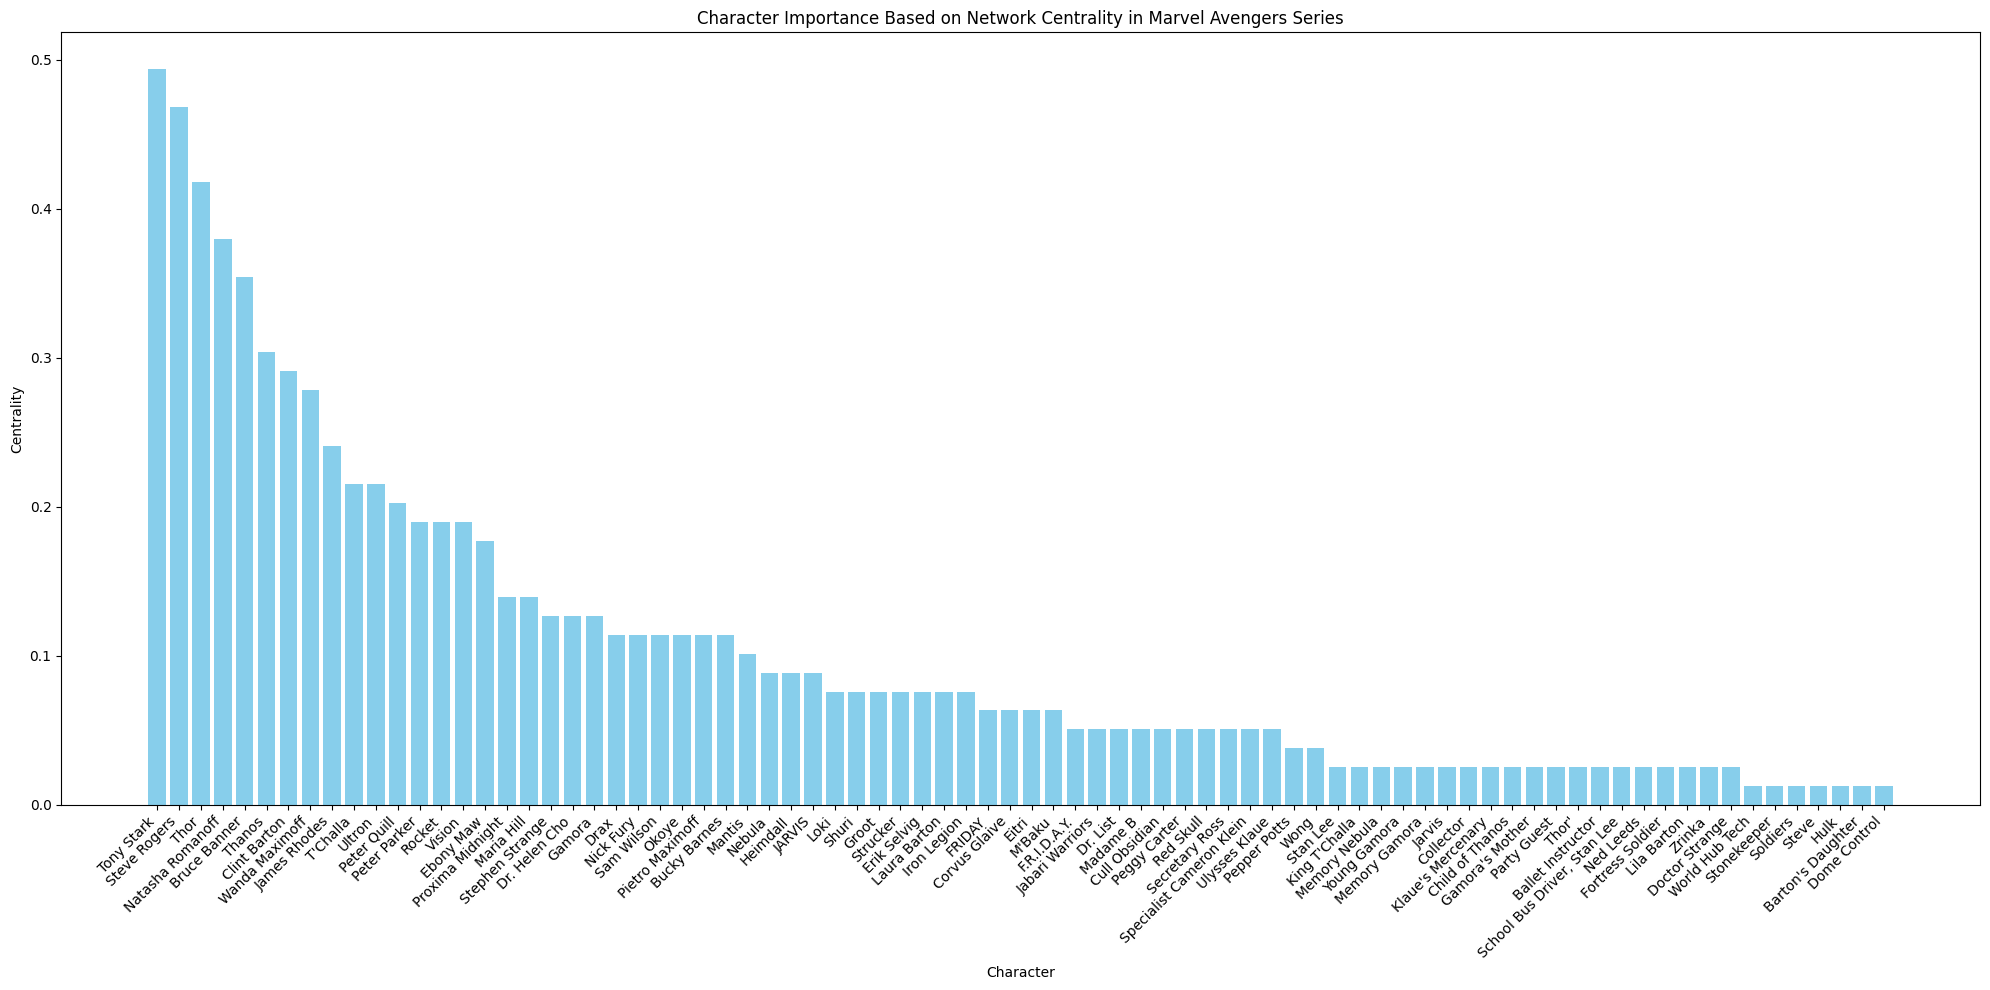

In [12]:
# Ensure the required libraries are installed
!pip install matplotlib

import matplotlib.pyplot as plt

# Plot centrality using Matplotlib with adjusted x-axis labels
plt.figure(figsize=(20, 10))  # Increase figure size for better visibility
plt.bar(centrality_df['Character'], centrality_df['Centrality'], color='skyblue')
plt.xlabel('Character')
plt.ylabel('Centrality')
plt.title('Character Importance Based on Network Centrality in Marvel Avengers Series')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels and align them to the right
plt.tight_layout()  # Adjust layout to fit x-axis labels
plt.show()
